# Task 2: Quantitative Analysis with Technical Indicators

In this notebook, we load stock data and calculate technical indicators (SMA, RSI, MACD) using our custom module `src.indicators`.

In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Add src to path
sys.path.append(os.path.abspath(os.path.join('../')))

from src.indicators import load_stock_data, calculate_sma, calculate_rsi, calculate_macd

In [2]:
# Load data for a sample stock (e.g., AAPL)
data_path = '../Data/Data/AAPL.csv'
if not os.path.exists(data_path):
    print(f"Data file not found at {data_path}. Please ensure data is extracted.")
else:
    df = load_stock_data(data_path)
    print(df.head())

               Close      High       Low      Open      Volume
Date                                                          
2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800


In [3]:
# Calculate Indicators
if 'df' in locals():
    df['SMA_20'] = calculate_sma(df, window=20)
    df['RSI'] = calculate_rsi(df)
    macd_data = calculate_macd(df)
    df = df.join(macd_data)
    
    print(df[['Close', 'SMA_20', 'RSI', 'MACD', 'Signal']].tail())

                 Close      SMA_20        RSI      MACD    Signal
Date                                                             
2023-12-22  191.788757  191.856618  59.246127  2.633141  3.235256
2023-12-26  191.243912  192.018094  49.031899  2.304751  3.049155
2023-12-27  191.342972  192.154308  52.291510  2.029104  2.845145
2023-12-28  191.768951  192.362839  47.920425  1.823998  2.640915
2023-12-29  190.728775  192.490633  40.185234  1.559539  2.424640


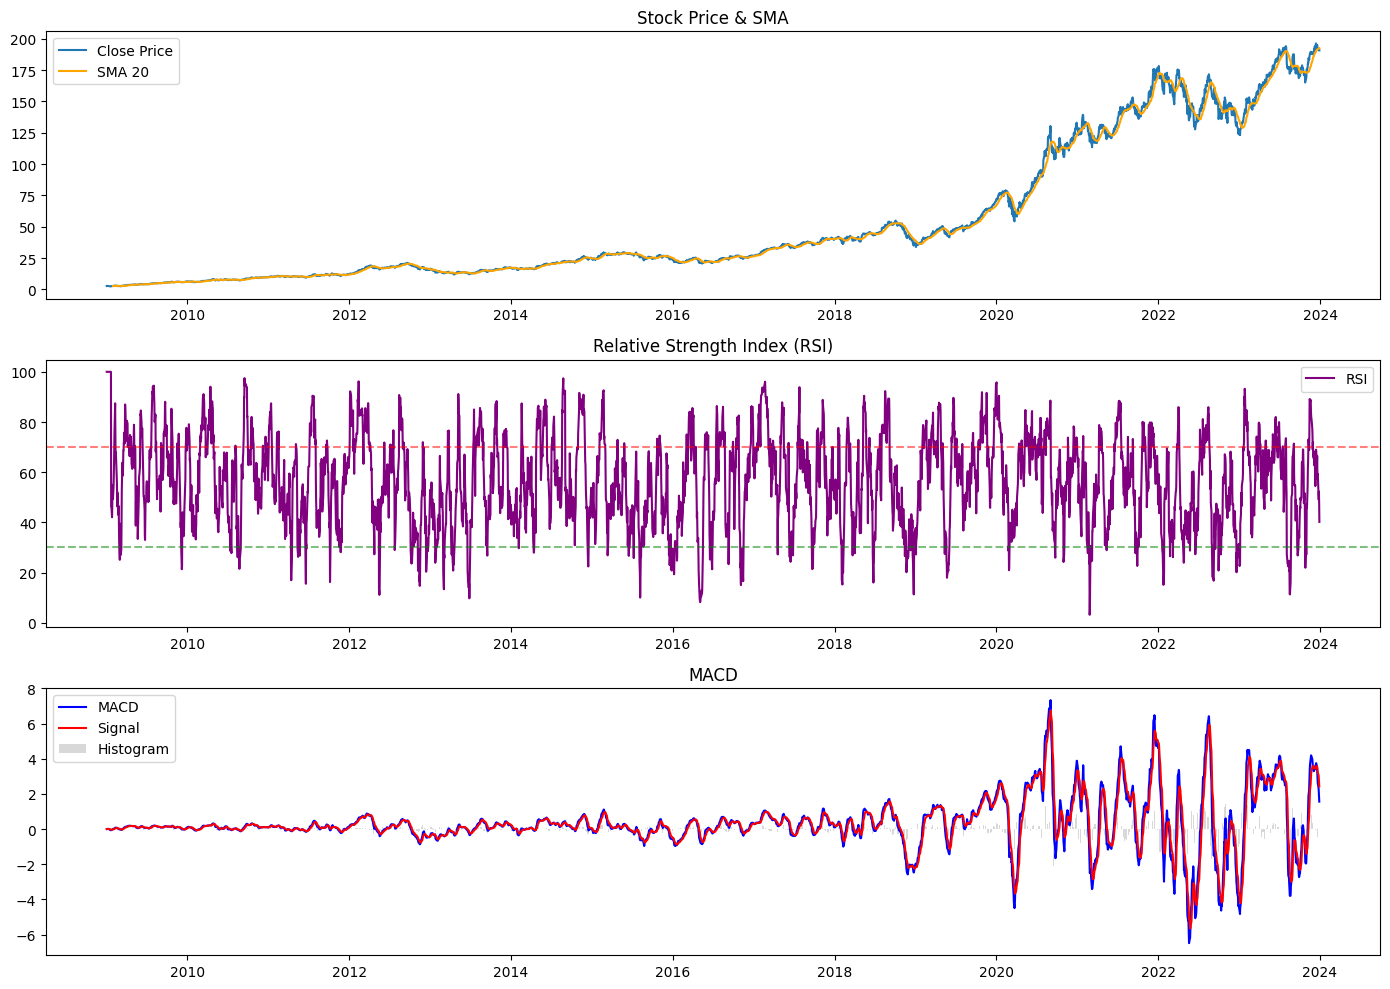

In [4]:
# Visualize
if 'df' in locals():
    plt.figure(figsize=(14, 10))
    
    # Price and SMA
    plt.subplot(3, 1, 1)
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.plot(df.index, df['SMA_20'], label='SMA 20', color='orange')
    plt.title('Stock Price & SMA')
    plt.legend()
    
    # RSI
    plt.subplot(3, 1, 2)
    plt.plot(df.index, df['RSI'], label='RSI', color='purple')
    plt.axhline(70, linestyle='--', color='red', alpha=0.5)
    plt.axhline(30, linestyle='--', color='green', alpha=0.5)
    plt.title('Relative Strength Index (RSI)')
    plt.legend()
    
    # MACD
    plt.subplot(3, 1, 3)
    plt.plot(df.index, df['MACD'], label='MACD', color='blue')
    plt.plot(df.index, df['Signal'], label='Signal', color='red')
    plt.bar(df.index, df['Hist'], label='Histogram', color='gray', alpha=0.3)
    plt.title('MACD')
    plt.legend()
    
    plt.tight_layout()
    plt.show()